In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv("sonar_data.csv",header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [5]:
df.value_counts()

0       1       2       3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30      31      32      33      34      35      36      37      38      39      40      41      42      43      44      45      46      47      48      49      50      51      52      53      54      55      56      57      58      59      60
0.0015  0.0186  0.0289  0.0195  0.0515  0.0817  0.1005  0.0124  0.1168  0.1476  0.2118  0.2575  0.2354  0.1334  0.0092  0.1951  0.3685  0.4646  0.5418  0.6260  0.7420  0.8257  0.8609  0.8400  0.8949  0.9945  1.0000  0.9649  0.8747  0.6257  0.2184  0.2945  0.3645  0.5012  0.7843  0.9361  0.8195  0.6207  0.4513  0.3004  0.2674  0.2241  0.3141  0.3693  0.2986  0.2226  0.0849  0.0359  0.0289  0.0122  0.0045  0.0108  0.0075  0.0089  0.0036  0.0029  0.0013  0.0010  0.0032  0.0047  M     1
0.0025  0.0309  0.0171  0.022

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [8]:
X=df.drop(columns=60,axis=1)
Y=df[60]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (166, 60) (42, 60)


In [9]:
lr=LogisticRegression();
lr.fit(X_train ,Y_train)

LogisticRegression()

In [10]:
X_train_predicted=lr.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predicted,Y_train)
print(f"The training data accuracy is {training_data_accuracy:.2f}")


The training data accuracy is 0.84


In [11]:
X_test_predicted=lr.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_predicted,Y_test)
print(f"The testing data accuracy is {testing_data_accuracy:.2f}")

The testing data accuracy is 0.86


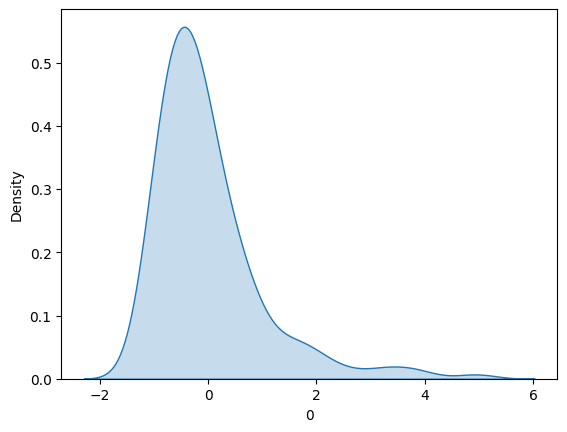

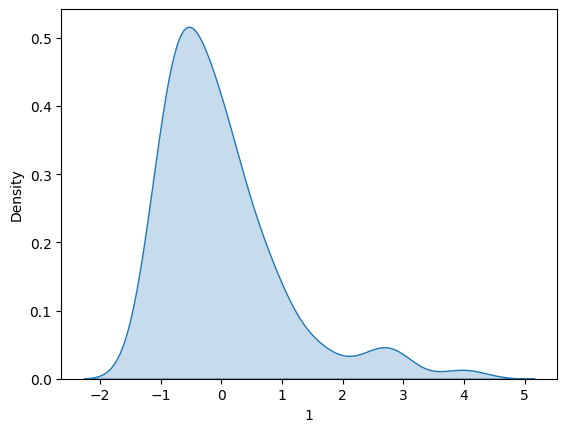

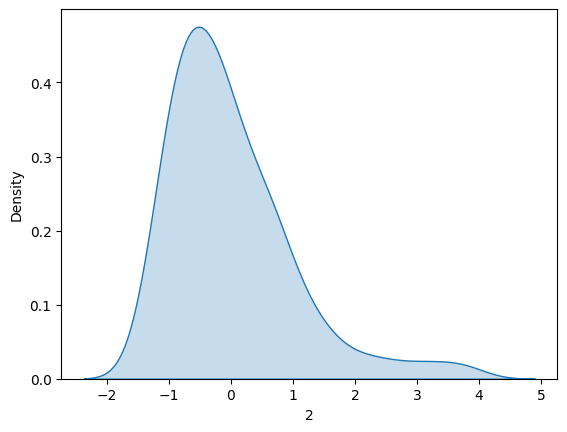

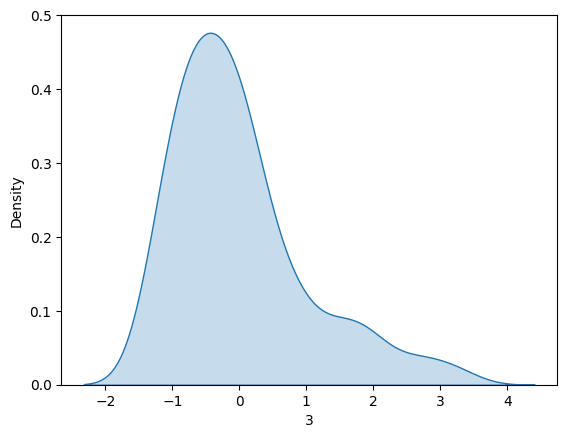

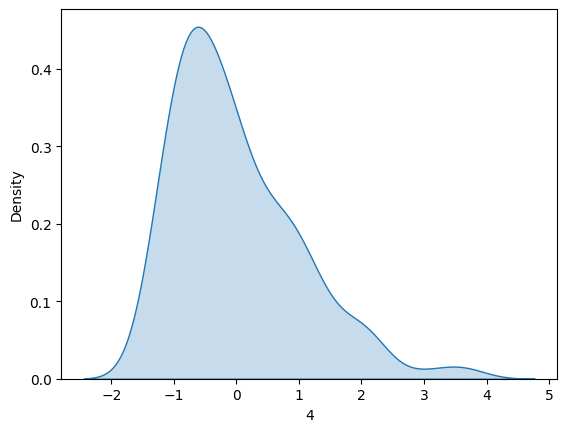

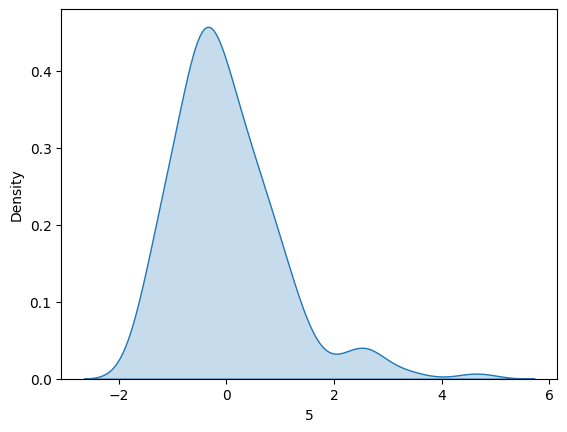

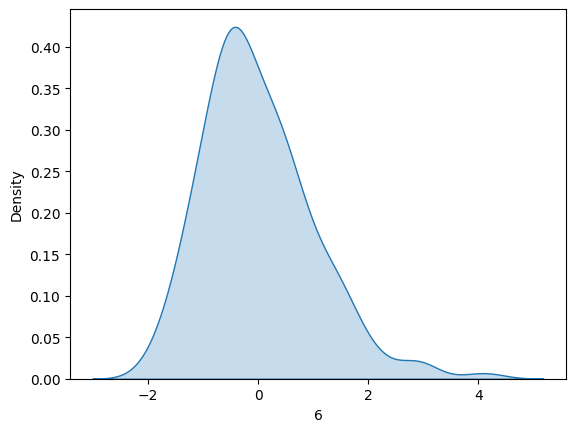

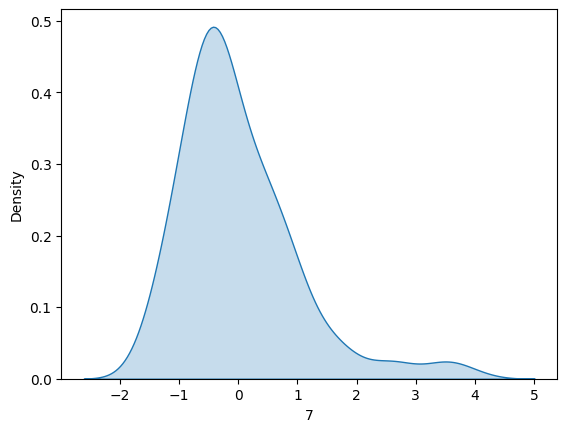

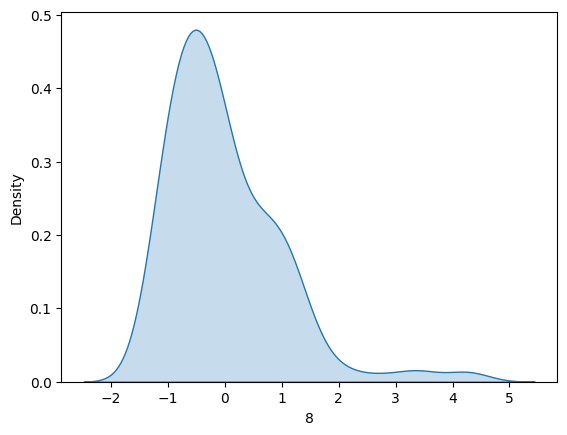

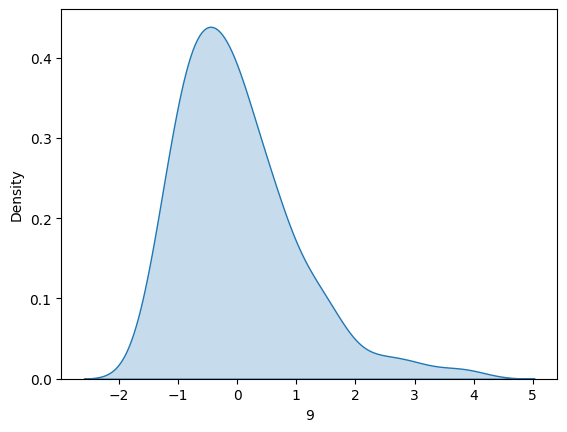

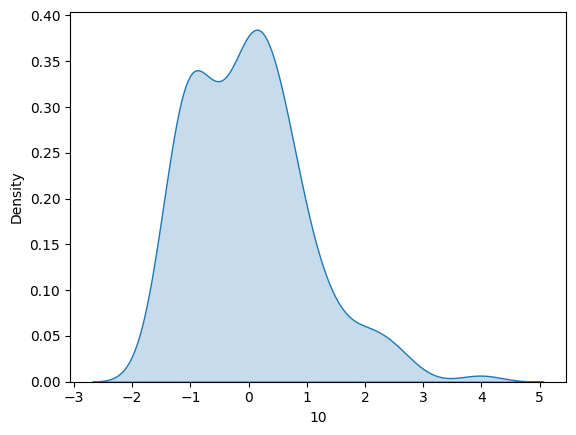

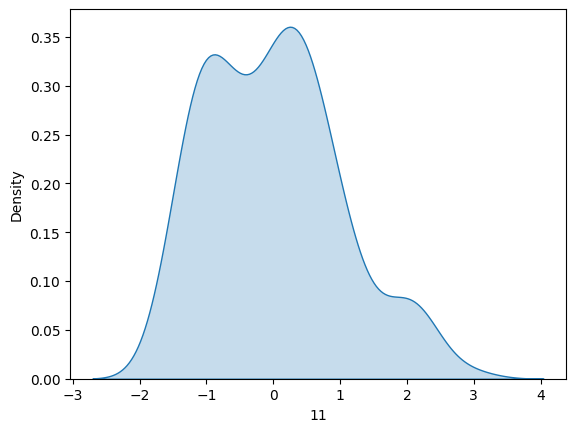

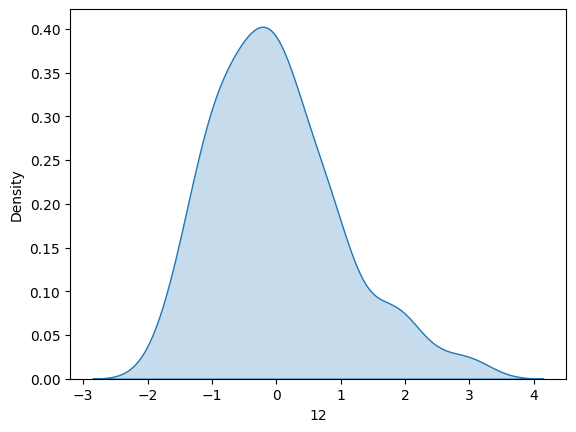

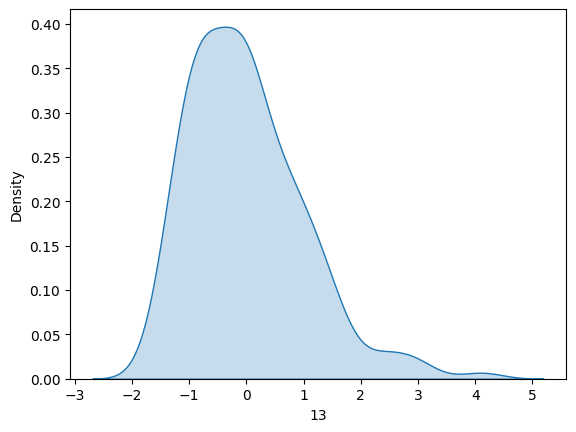

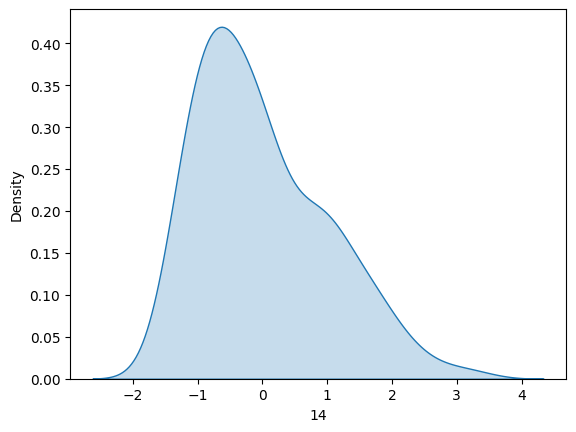

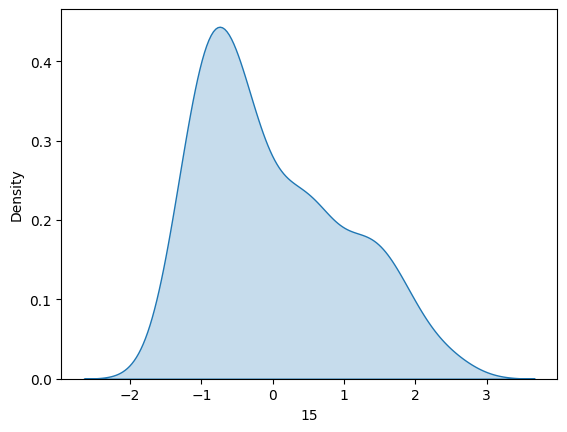

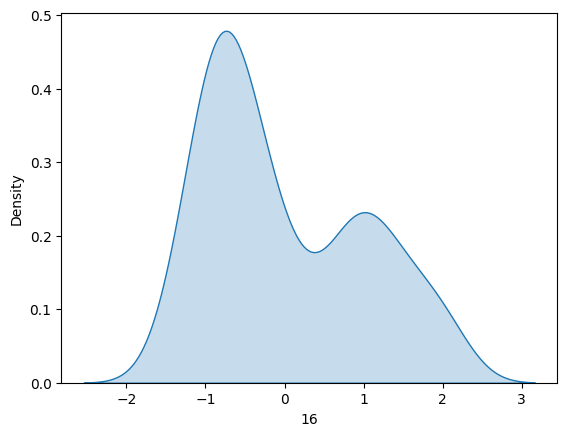

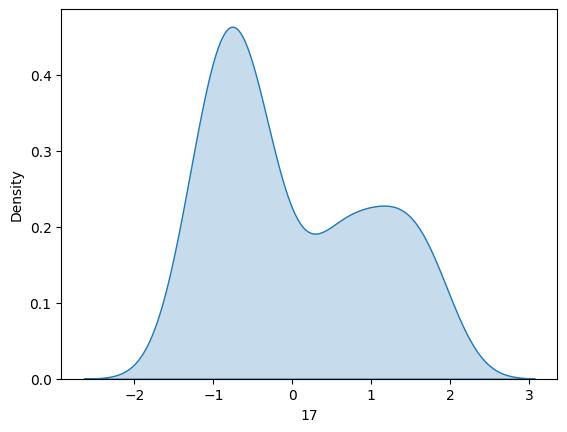

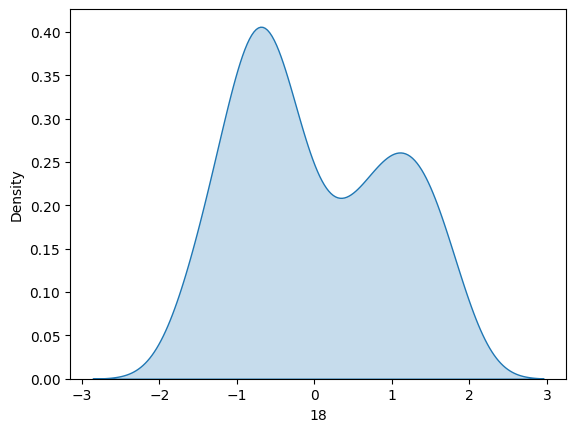

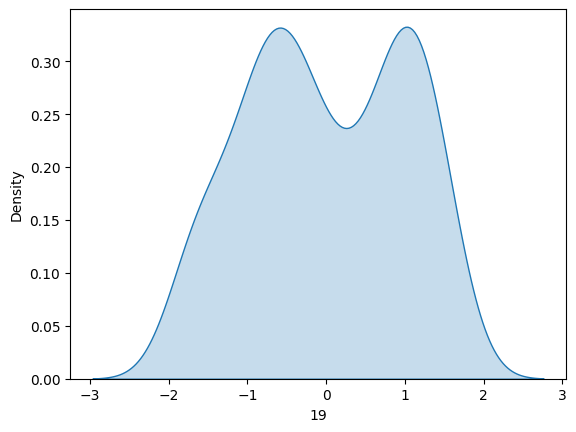

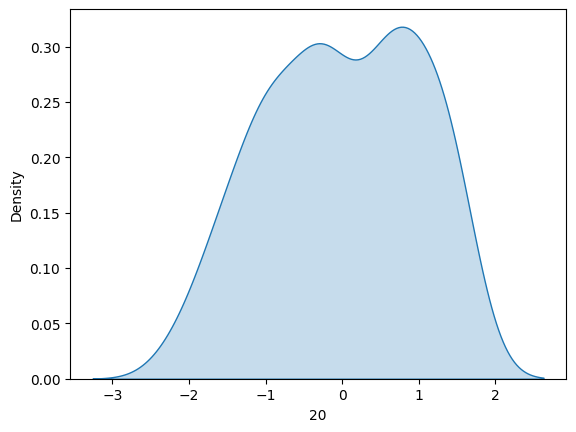

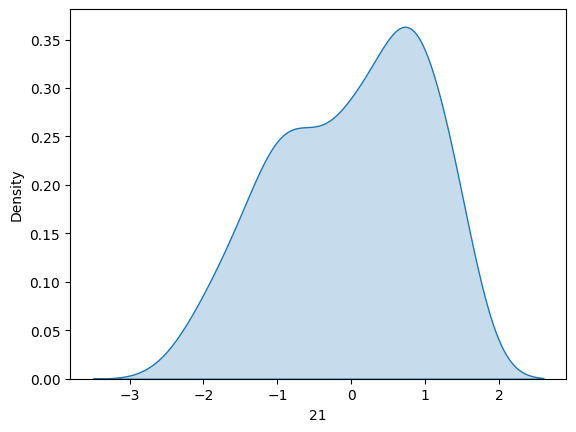

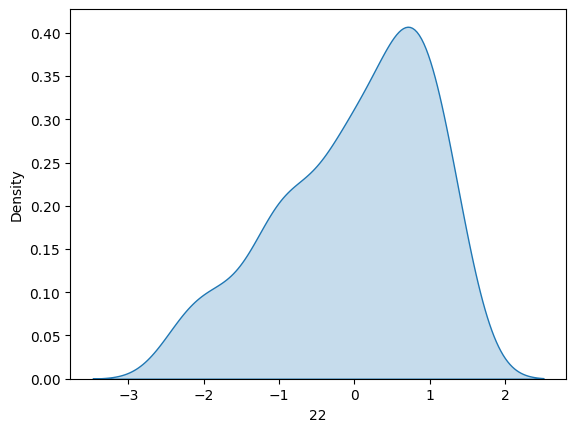

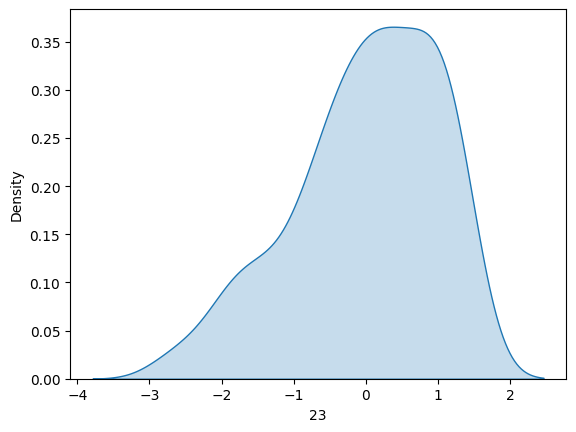

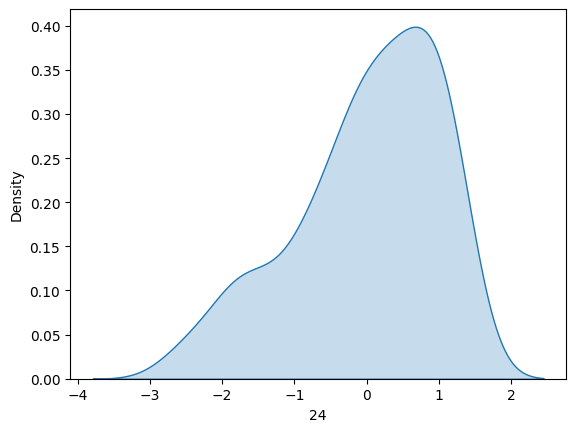

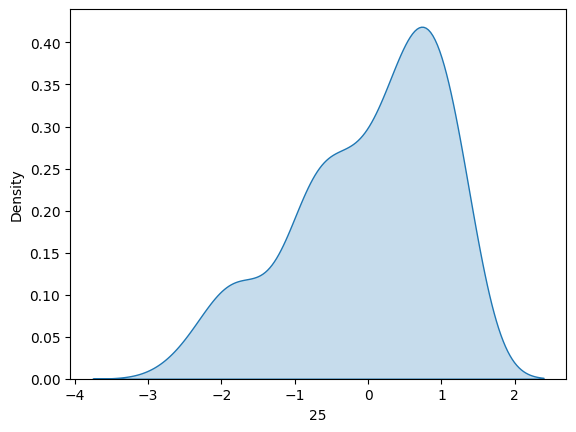

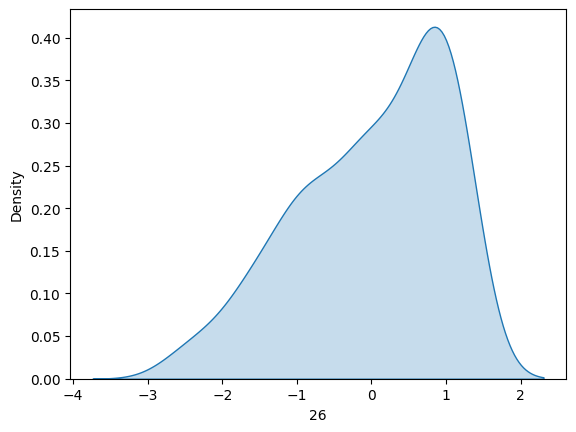

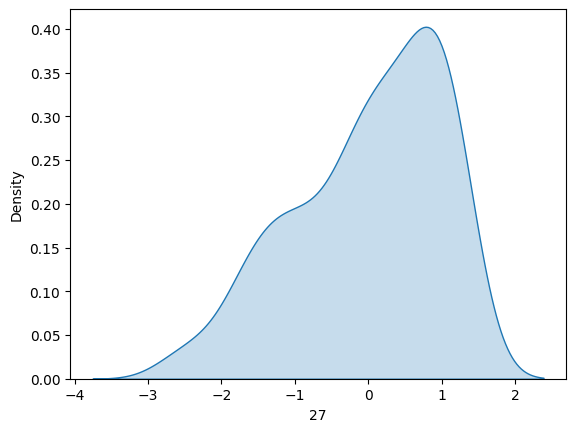

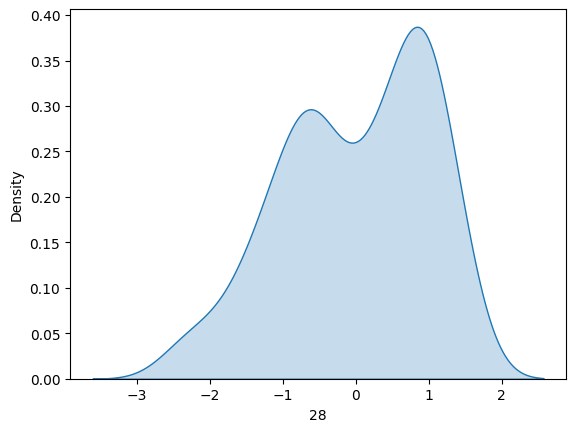

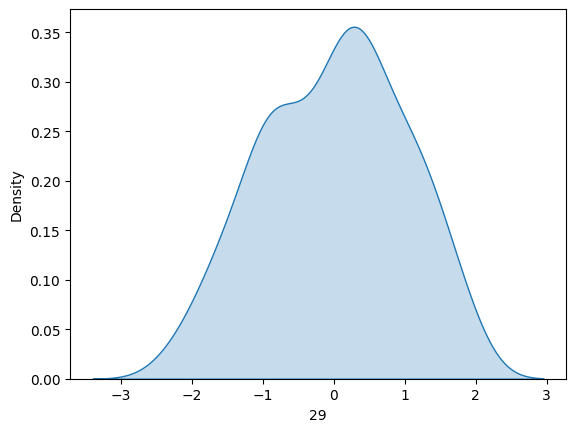

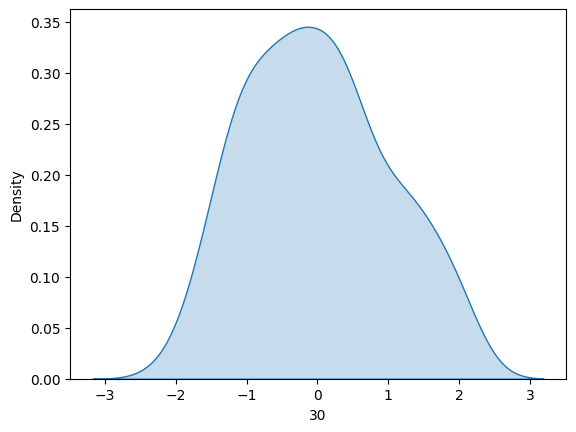

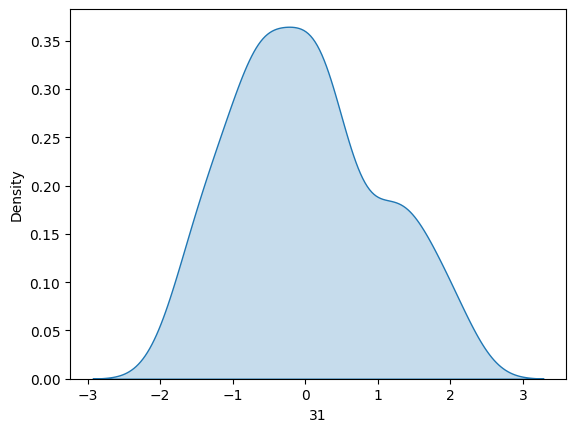

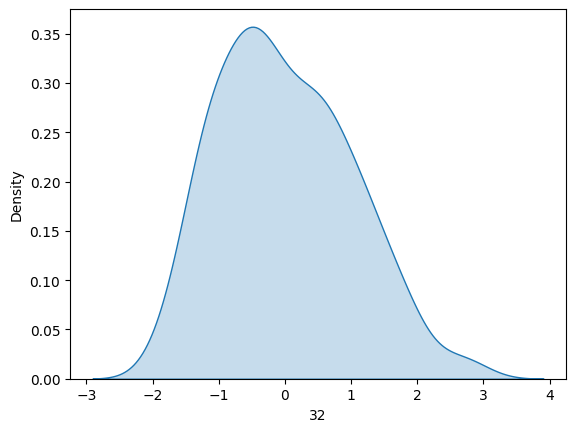

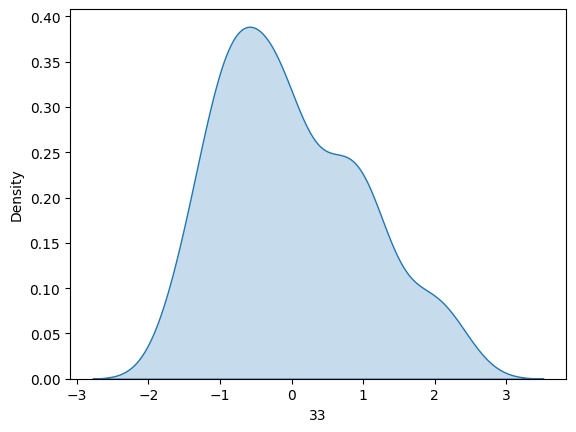

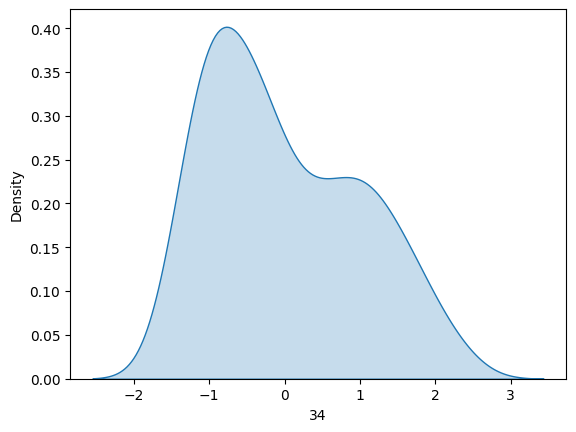

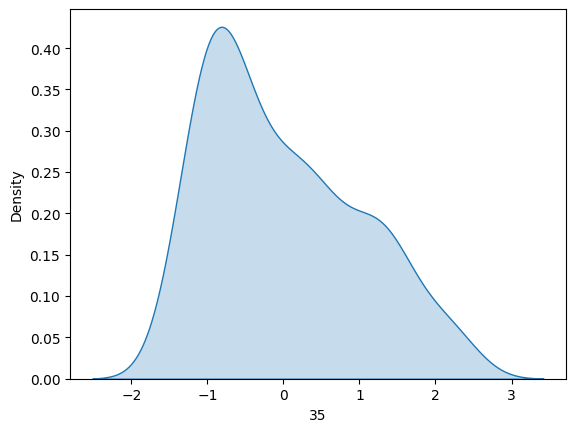

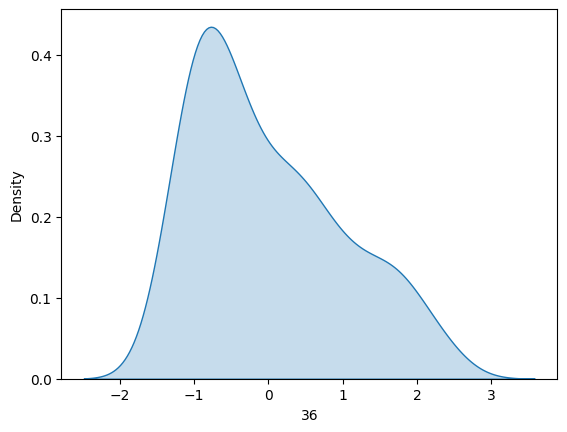

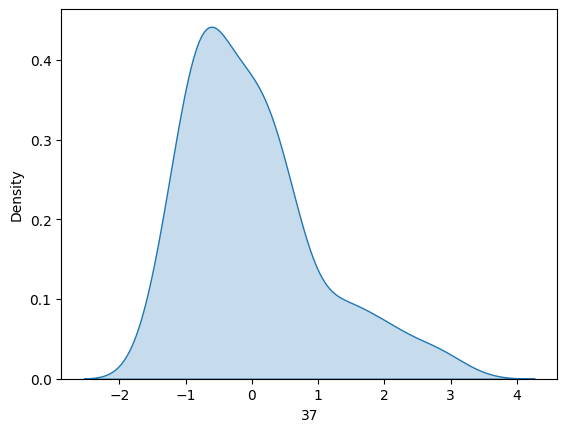

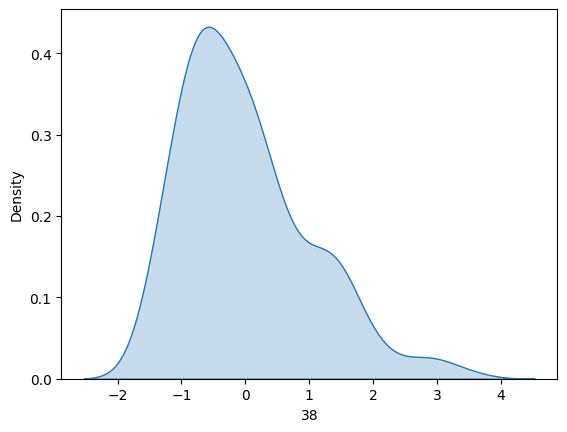

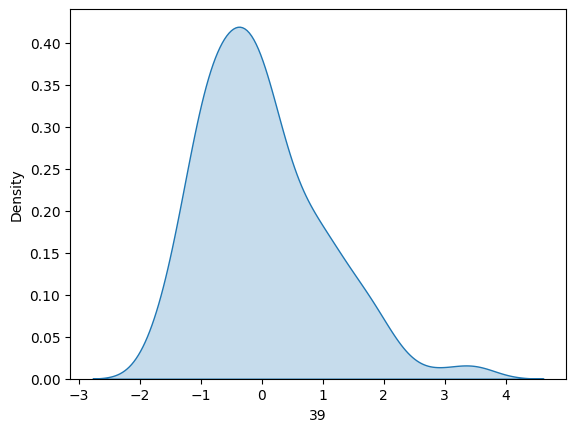

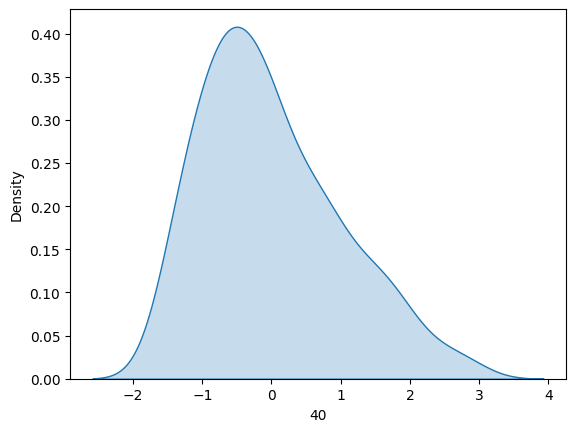

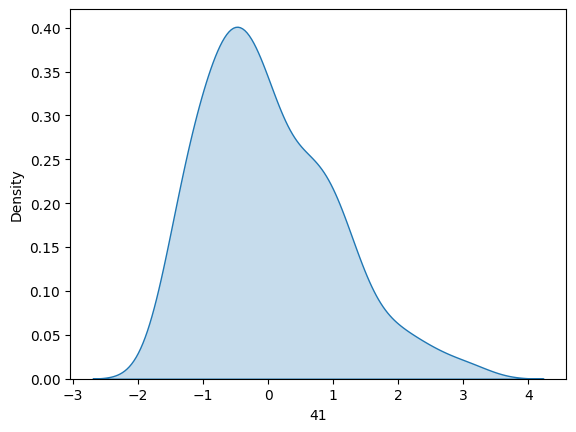

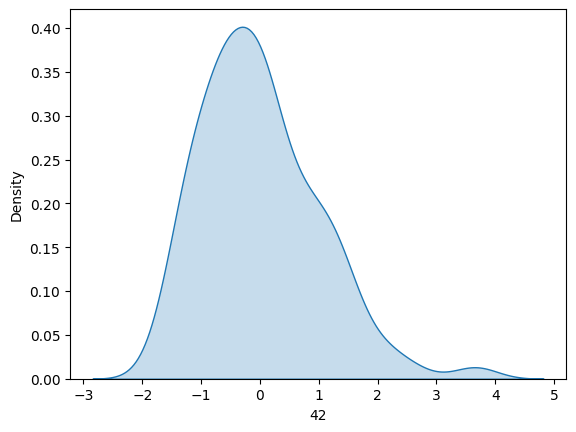

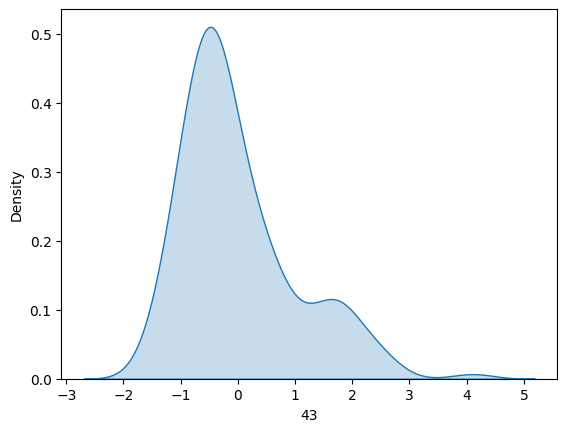

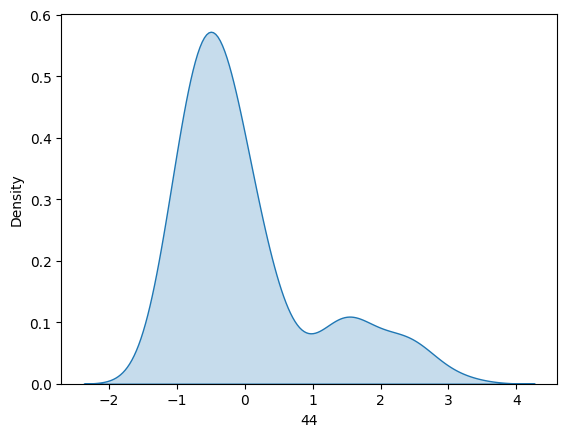

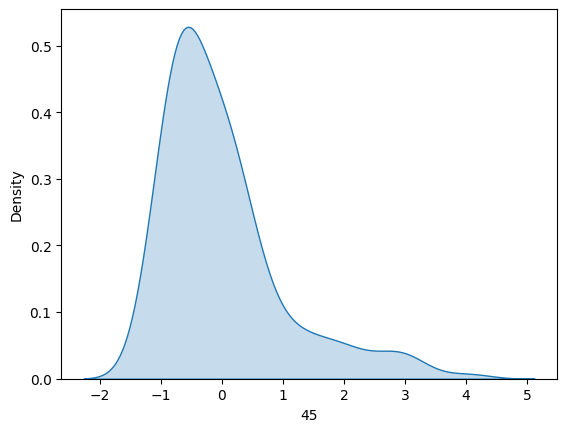

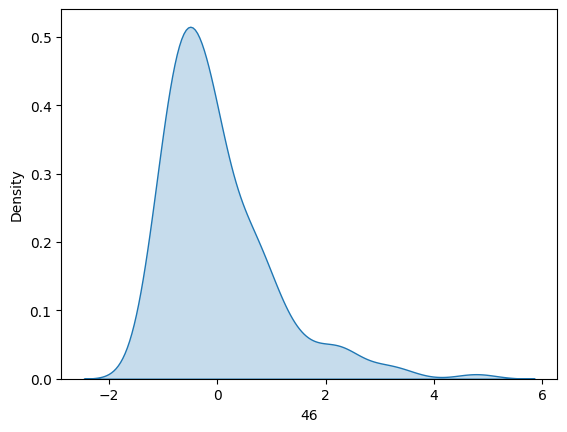

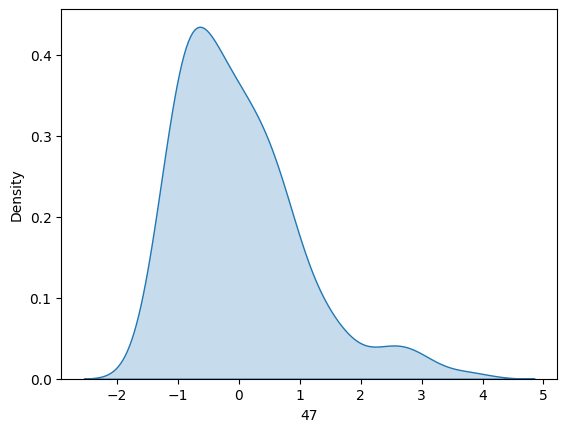

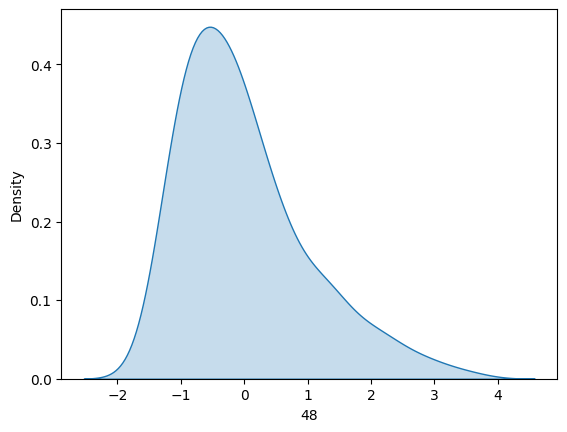

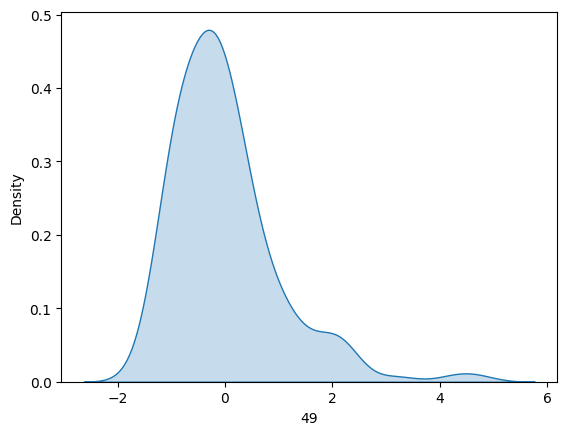

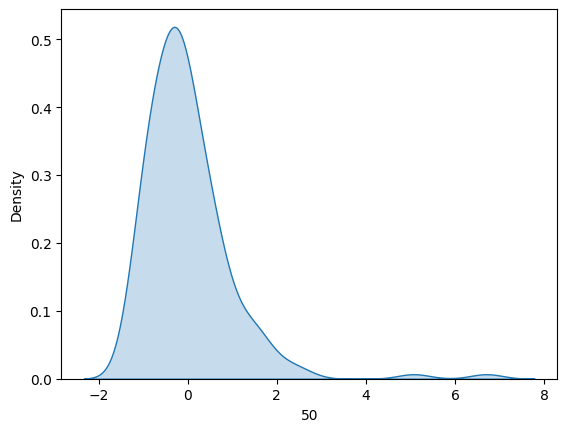

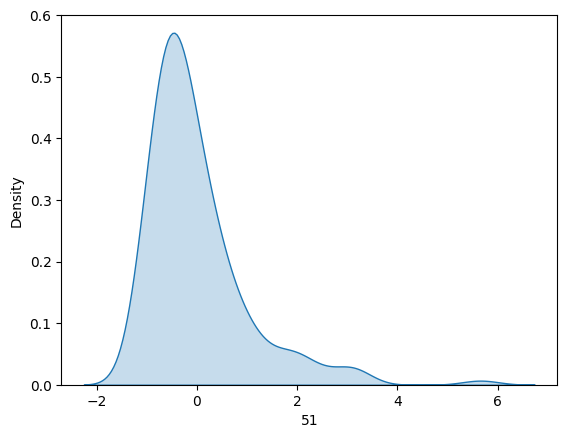

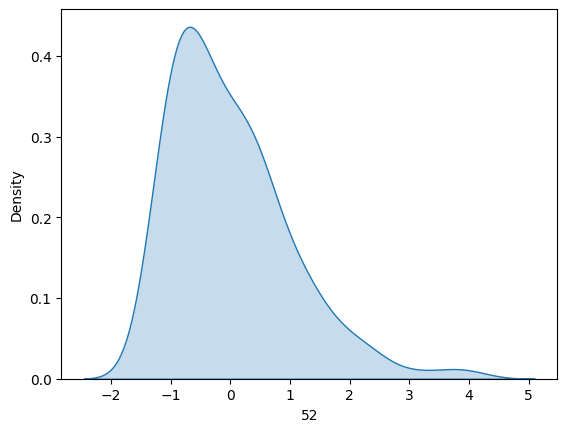

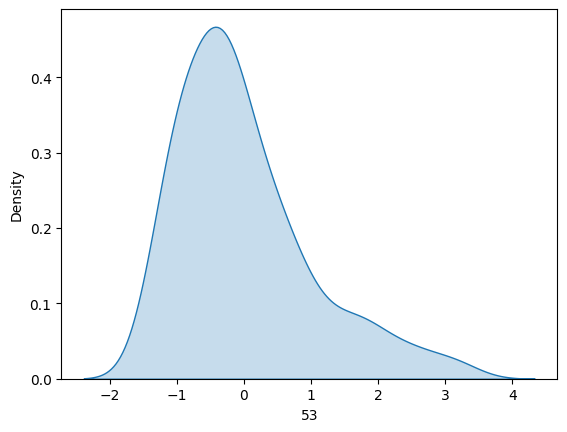

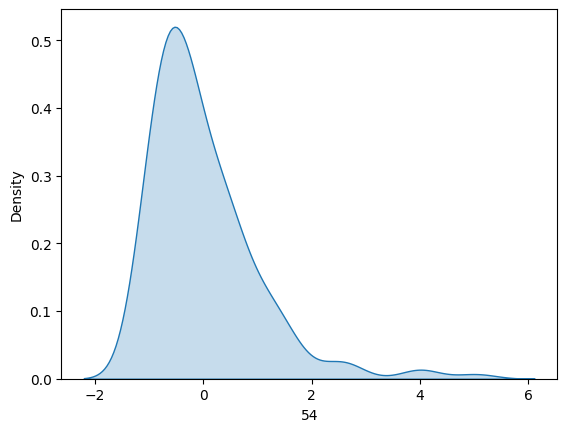

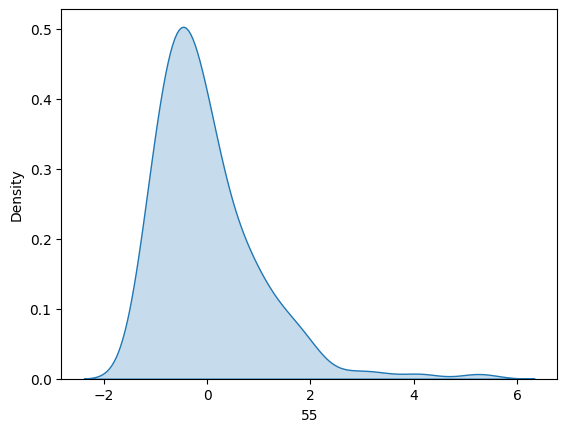

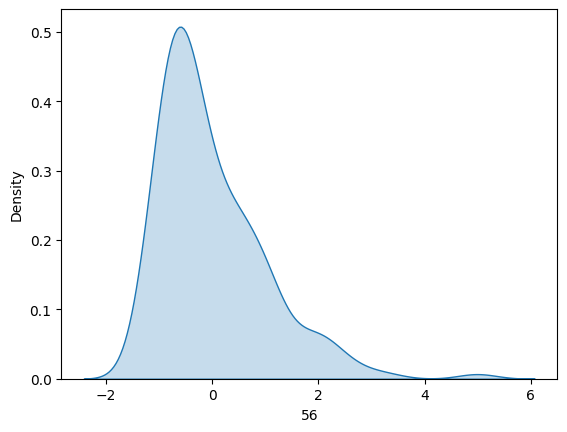

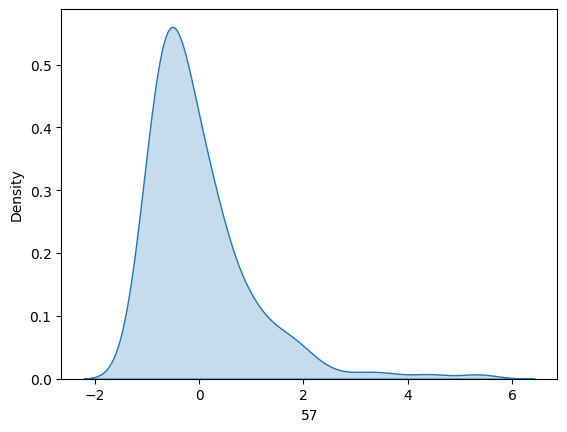

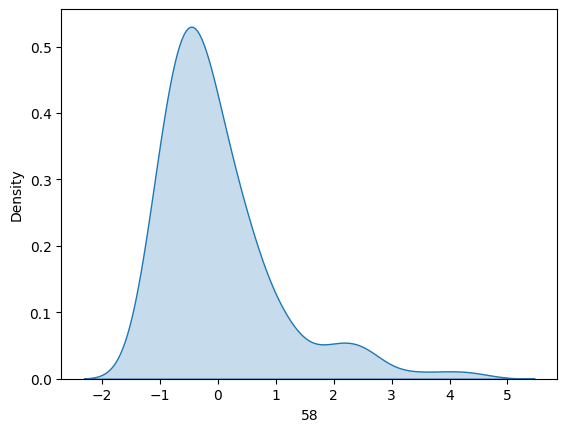

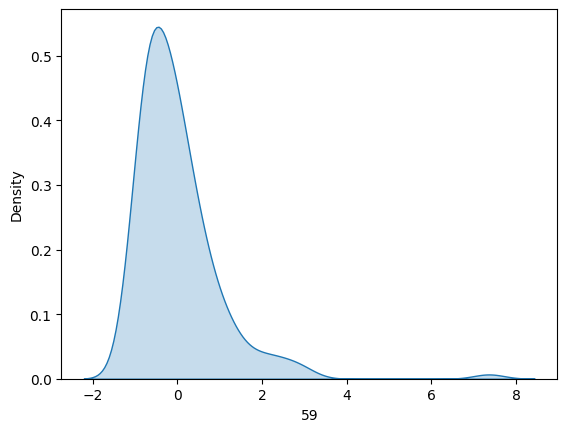

In [12]:
scaling=StandardScaler();
X_train_scaled=scaling.fit_transform(X_train)
X_test_scaled=scaling.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
for i in X_train_scaled_df.select_dtypes(include="number").columns: 
    sns.kdeplot(data=X_train_scaled_df, x=i, fill=True)
    plt.show()



In [13]:
X_train_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.922181,-0.300708,0.495110,2.066838,2.086651,1.437644,1.635030,-0.668673,-0.447258,-0.017949,...,0.874270,-0.505250,0.362218,0.700667,-0.391491,0.608604,2.099616,0.904994,3.892707,7.356578
1,3.105079,1.456356,0.609592,0.260342,-0.245378,0.263527,-0.438332,3.516268,3.426776,2.325151,...,0.382872,-0.583754,-0.310388,2.596022,1.404681,2.181093,0.877501,1.809631,2.003129,-0.443435
2,0.208277,-0.368786,-0.105143,0.156646,-0.423057,0.069237,0.807640,0.440852,0.085874,0.476158,...,-0.219487,-0.122544,-0.898919,-0.740870,-0.405634,-0.625716,-0.578252,-0.844959,-1.171983,-0.639415
3,-0.720713,-0.945829,-0.754902,-1.014029,-0.610830,-0.639253,-0.983954,-1.440252,-0.746122,-0.882636,...,-0.171932,-0.868331,-1.053059,-1.167993,-0.971358,-0.591899,1.093169,0.904994,-0.815751,0.007320
4,-0.793934,-0.624889,0.052655,1.592019,2.371340,-0.210475,-0.736388,-0.276221,-0.868424,-0.816964,...,-1.004138,0.299414,-0.058161,-0.327096,2.536129,3.280144,0.356306,-0.370395,1.042851,0.556064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-0.899189,-0.605438,-1.163322,-1.224150,-0.966187,-0.990986,-1.210346,-1.529886,-1.154369,-1.103108,...,-1.075470,-0.623006,-0.548603,0.273545,0.329807,-0.490448,0.212528,-0.429716,-0.351100,-0.757003
162,-0.894613,-0.125650,-0.389800,-0.372750,1.125572,1.248378,1.133384,0.450542,0.090180,-0.254839,...,0.462130,0.201284,0.124003,1.768472,1.036961,-0.473539,0.014833,-0.355565,0.160015,0.066114
163,2.592533,0.266610,-0.154649,-0.844841,-0.713803,-0.863692,1.509619,2.168124,0.923037,0.547303,...,-0.235338,0.387731,0.488332,-0.393834,-0.759211,-0.541173,3.249841,0.341450,-0.676356,-0.521827
164,-0.267659,-0.067297,-1.243769,-0.569227,-0.806680,-0.317669,0.854873,0.037498,-0.604872,-1.332180,...,-0.029268,-0.259926,-0.086186,-1.154645,-0.547065,-0.186095,-0.380557,-0.607677,-0.583426,-0.659013


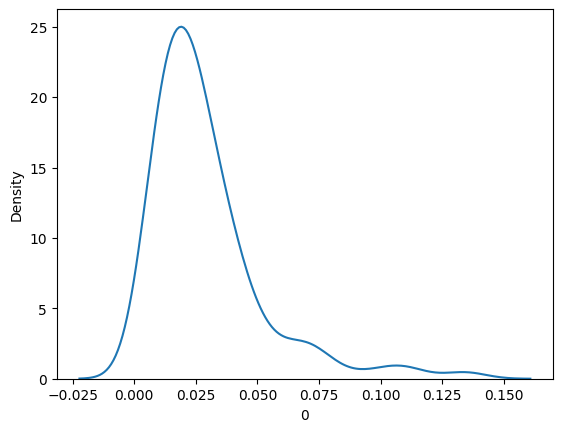

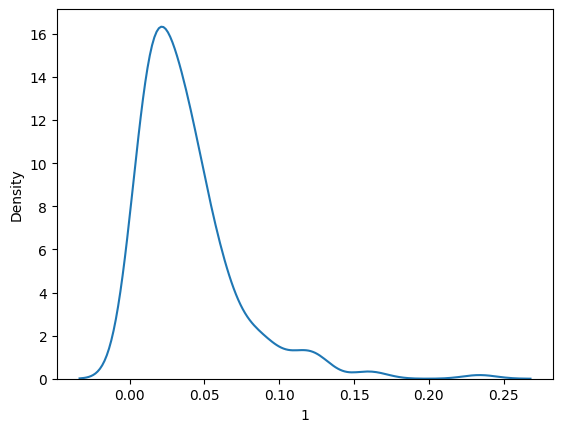

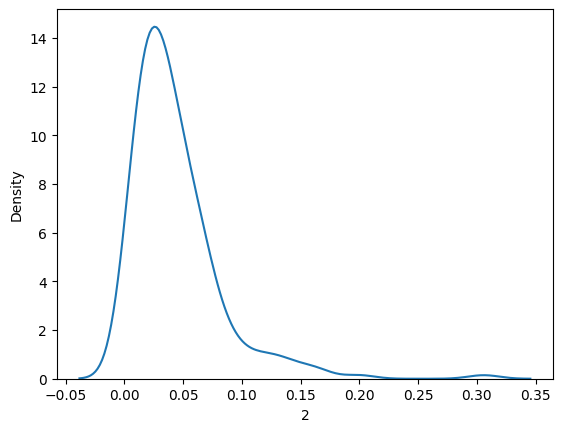

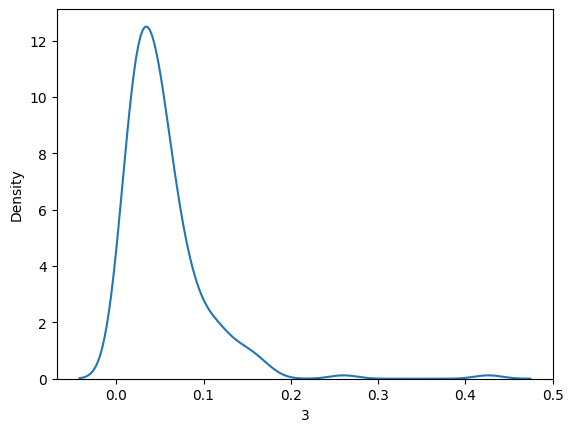

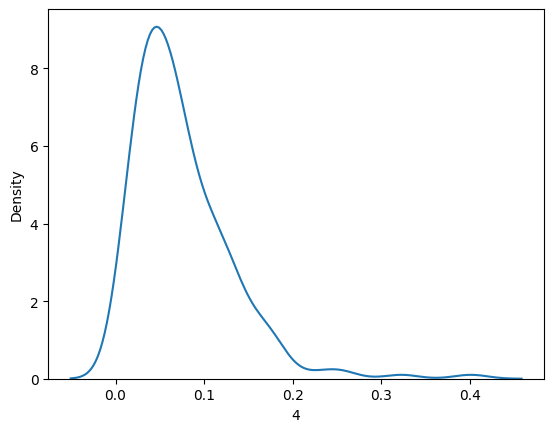

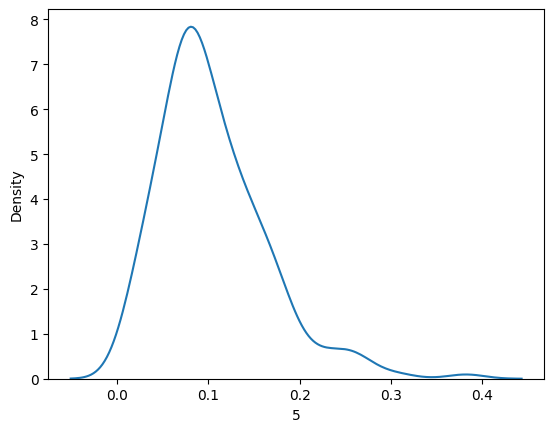

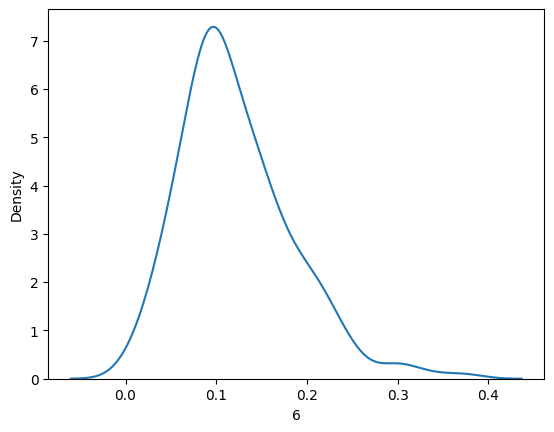

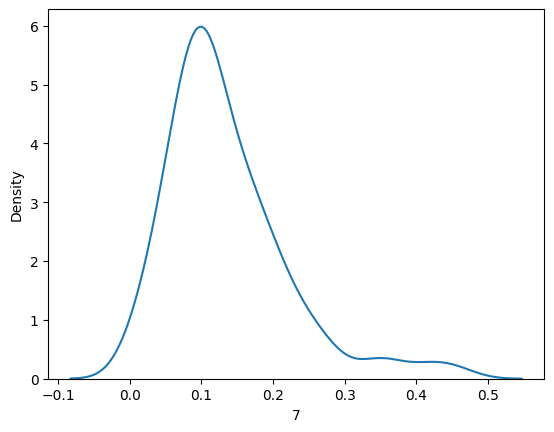

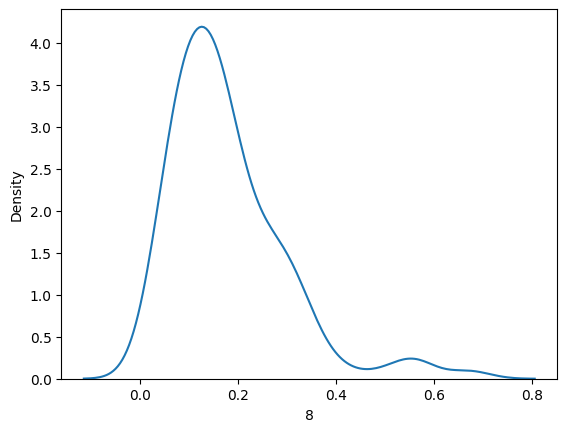

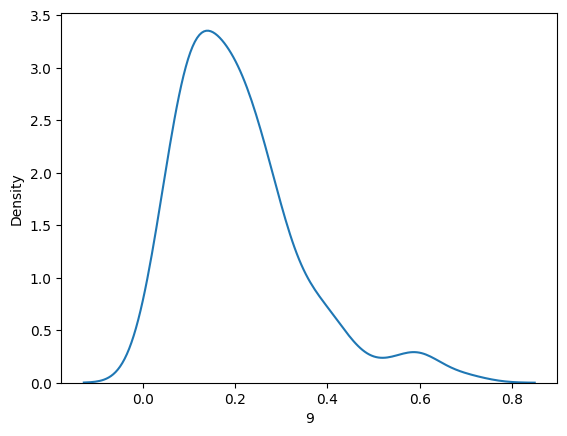

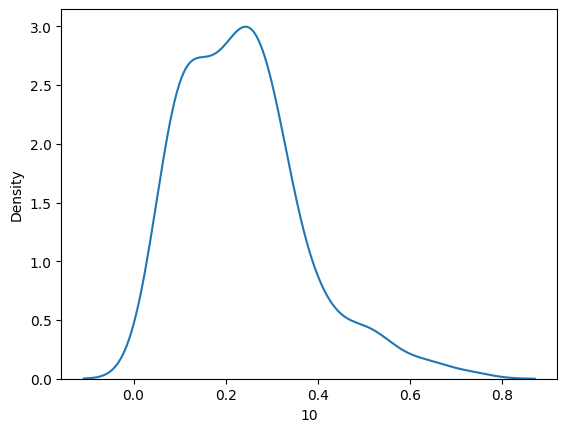

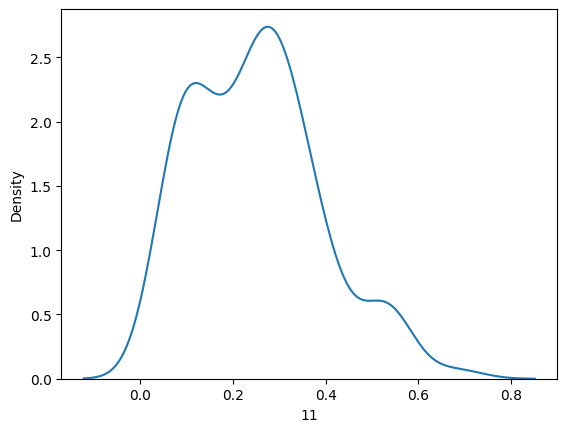

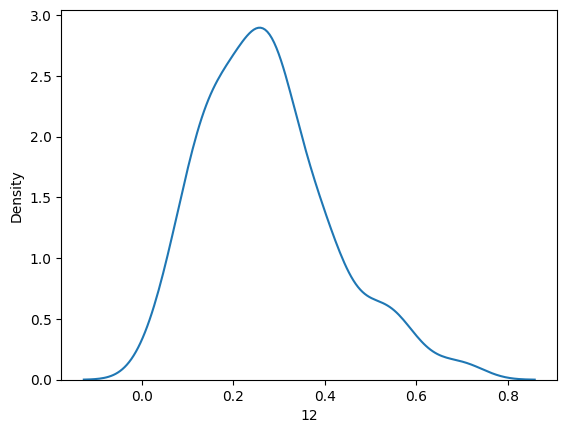

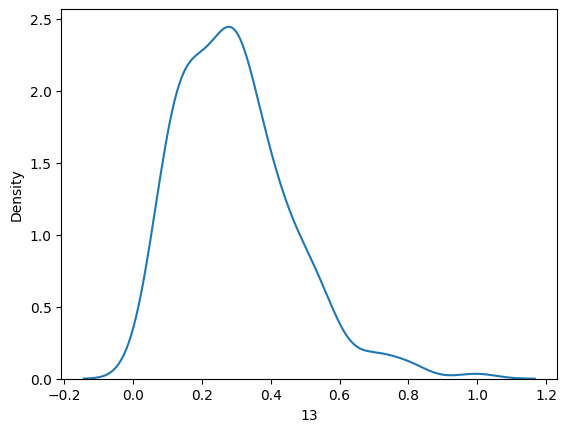

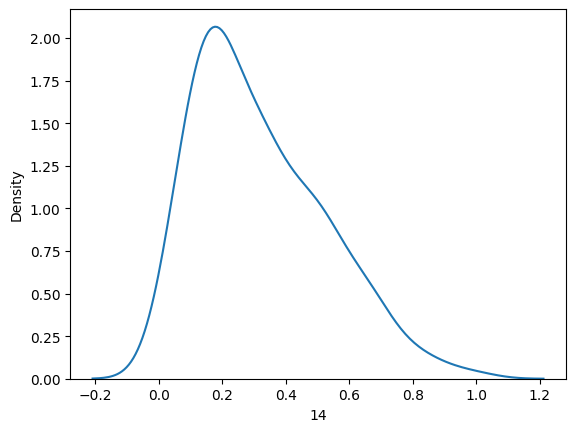

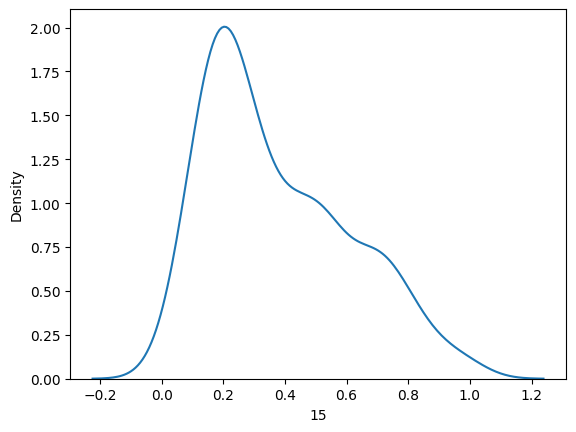

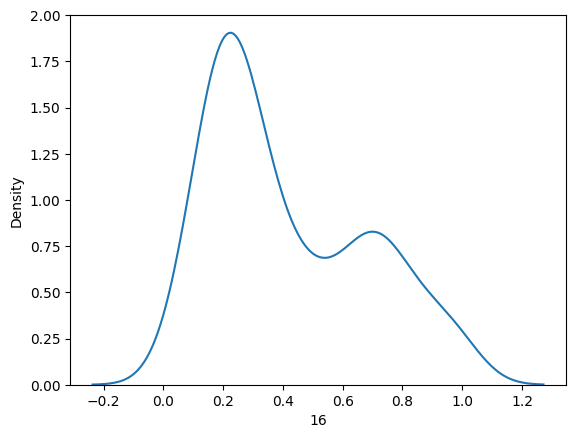

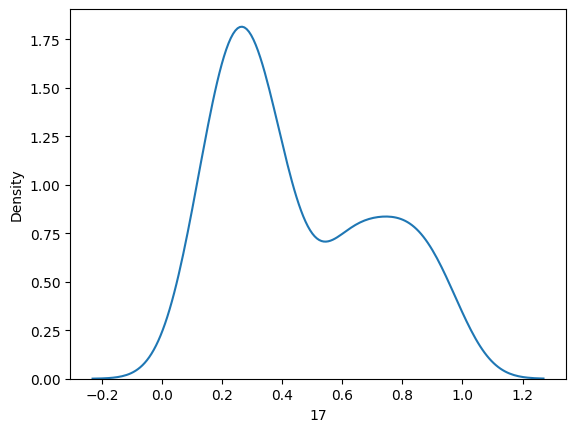

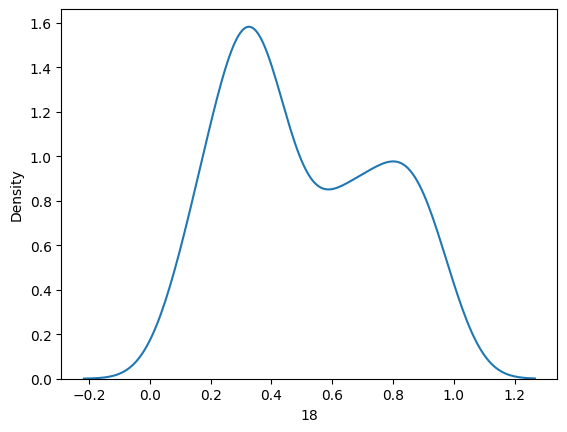

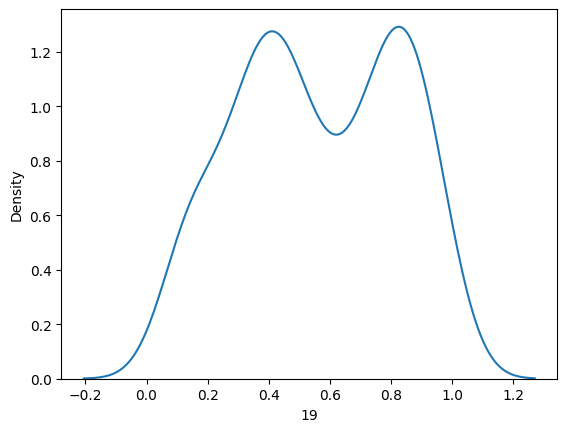

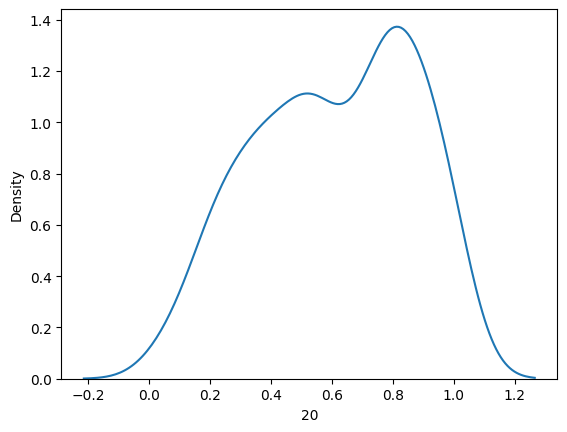

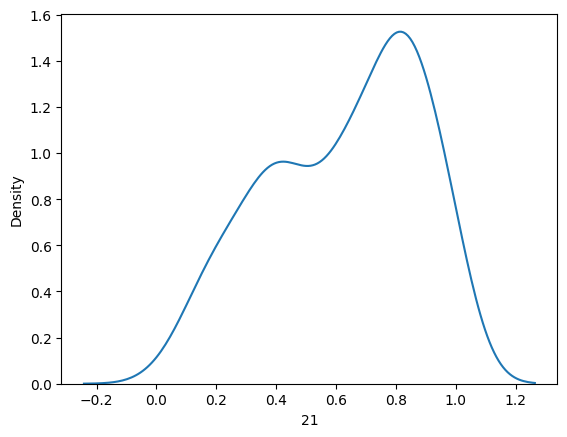

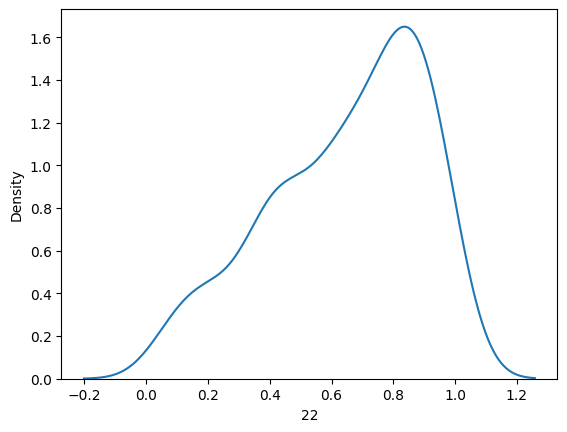

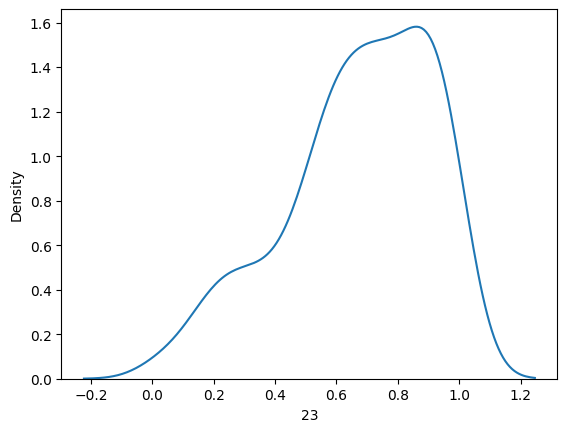

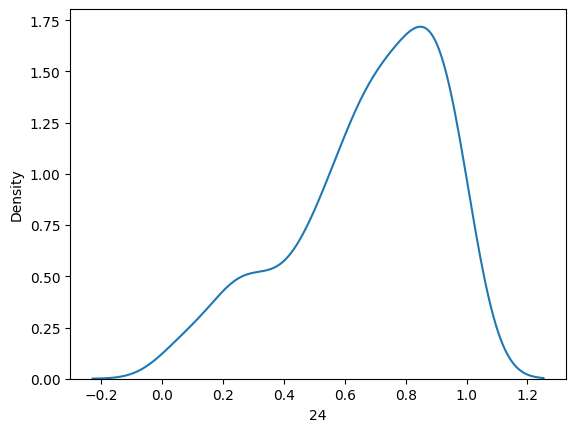

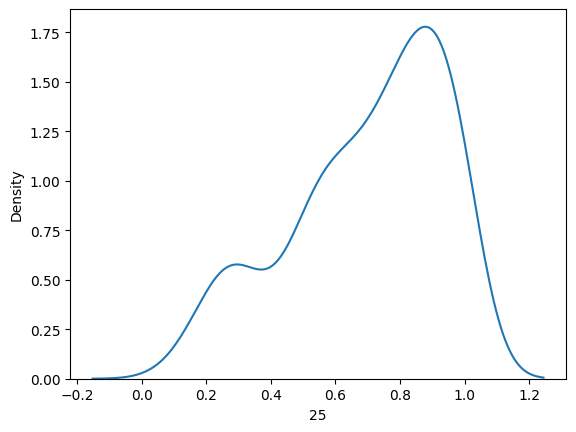

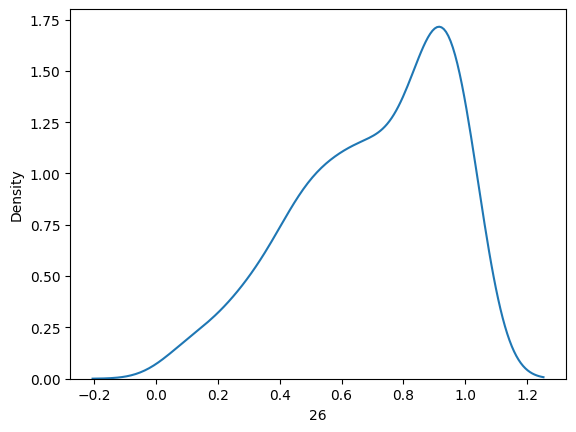

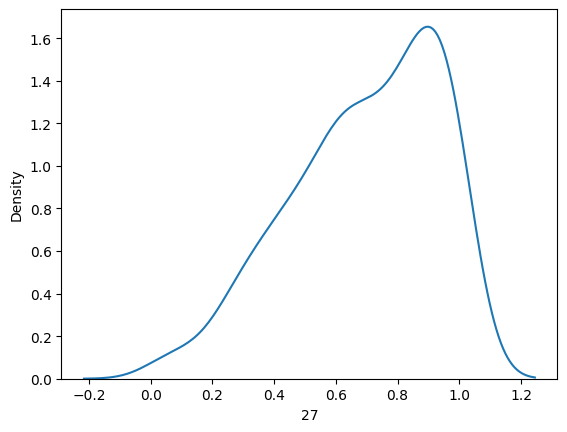

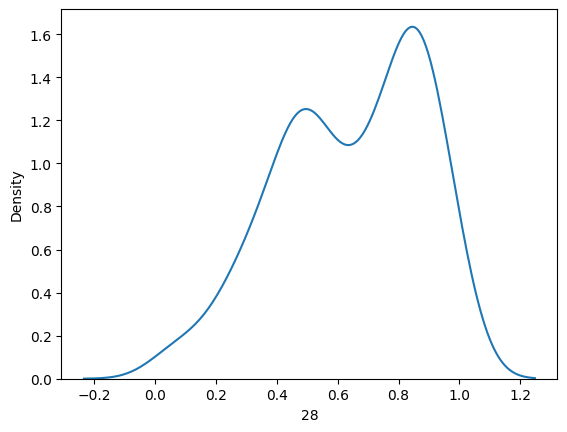

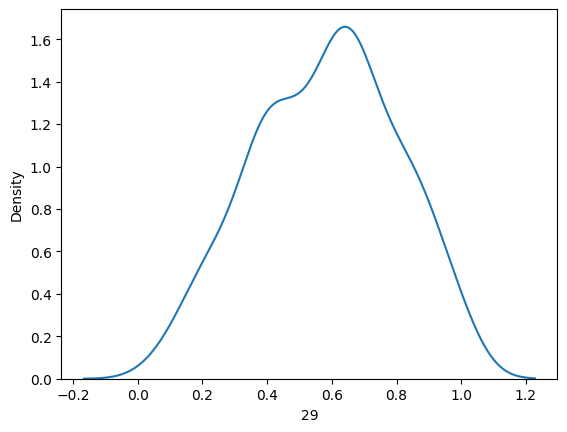

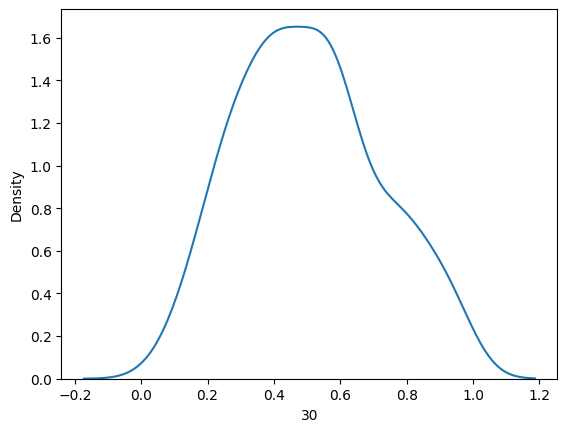

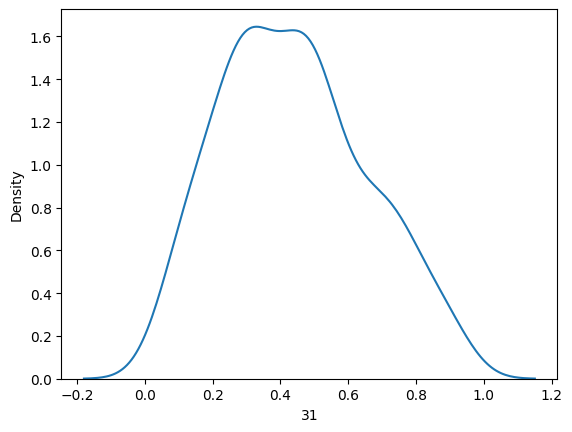

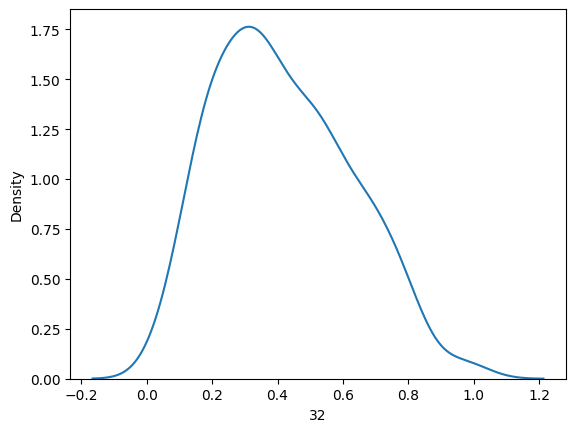

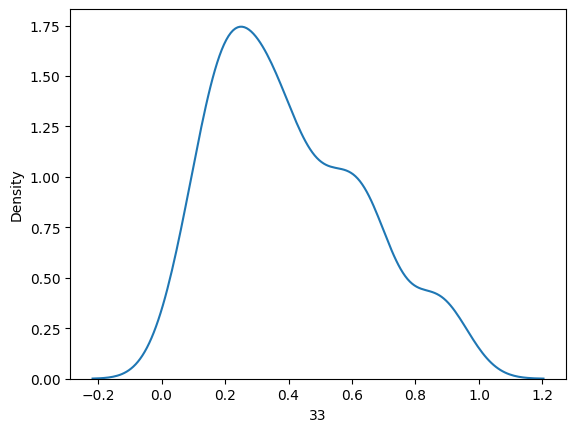

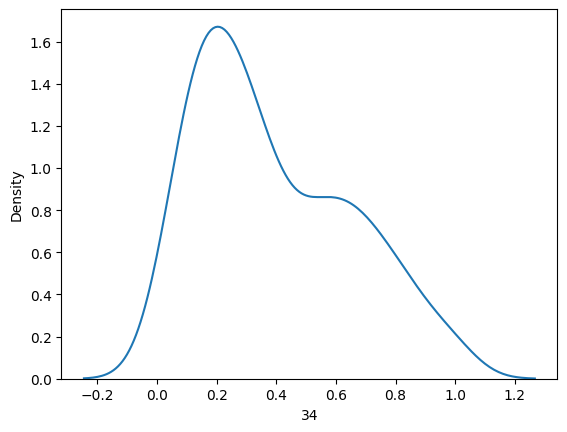

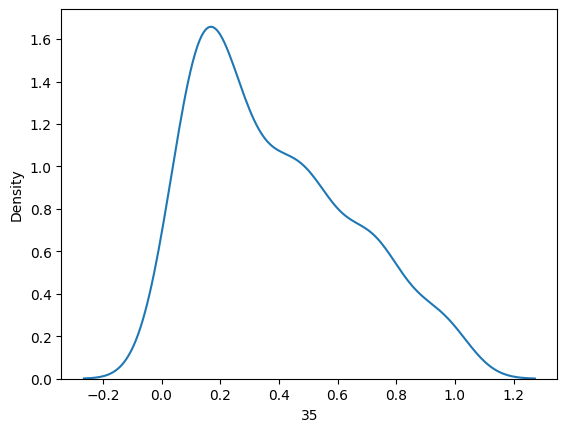

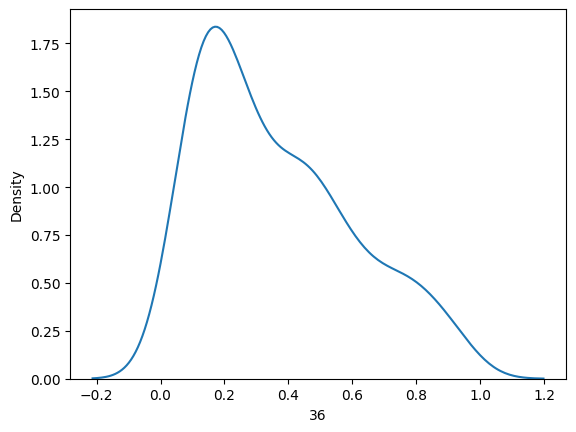

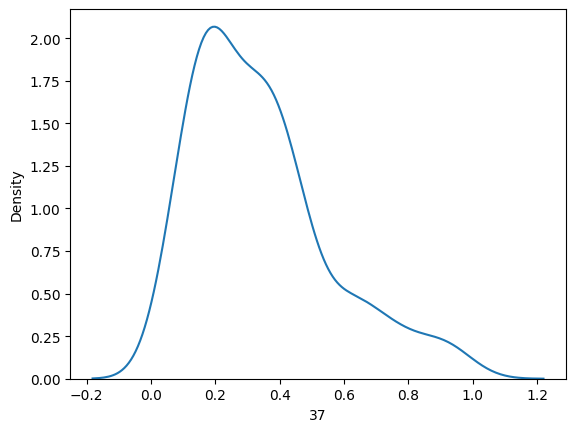

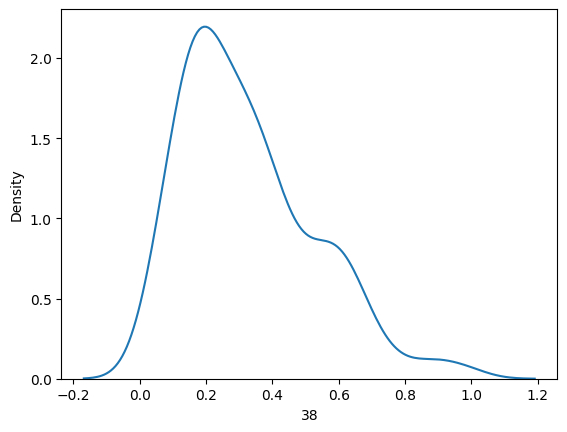

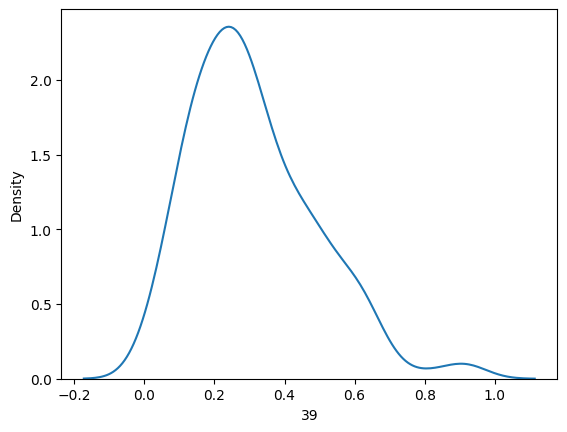

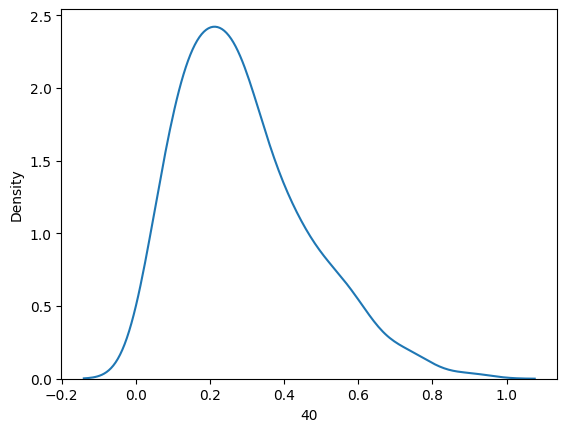

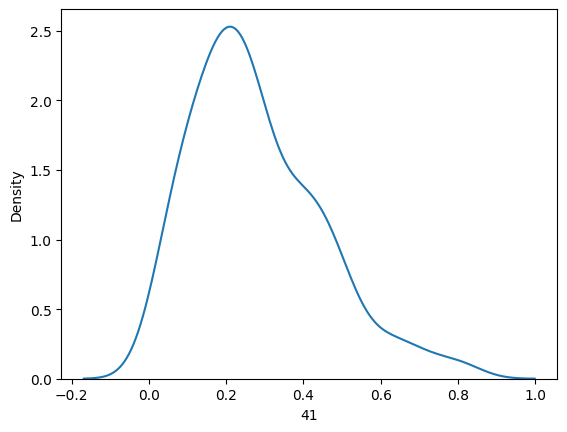

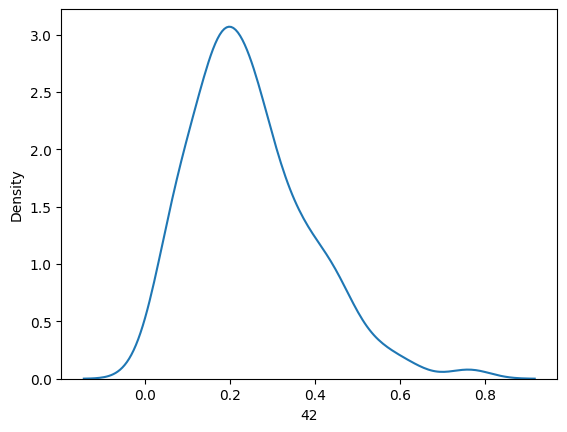

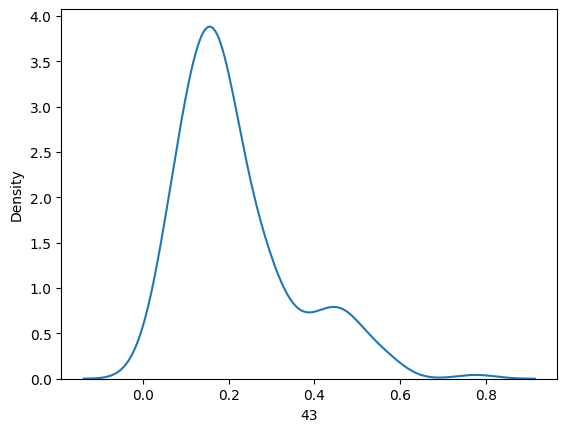

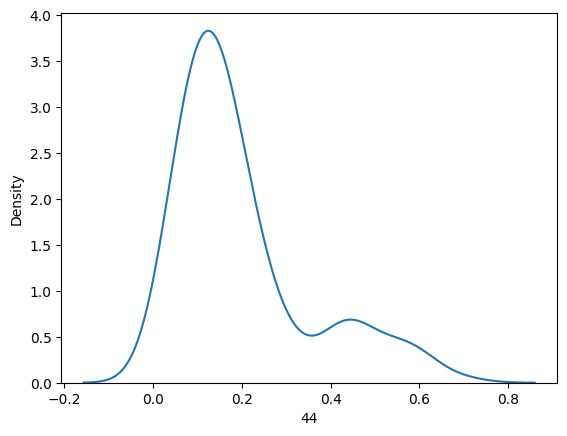

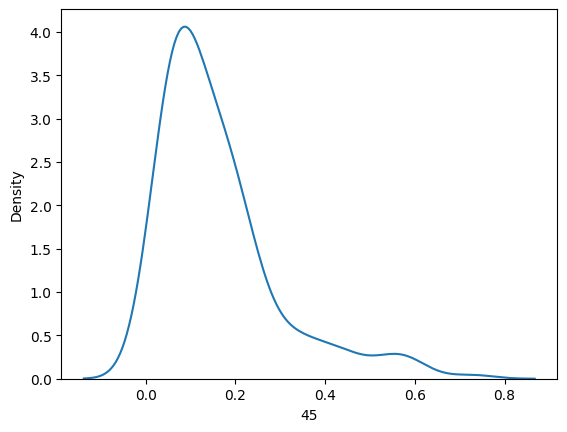

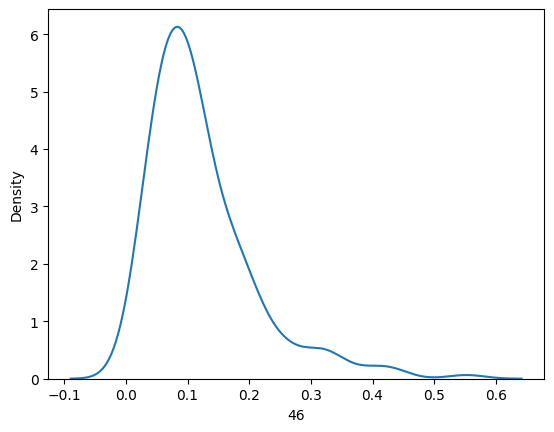

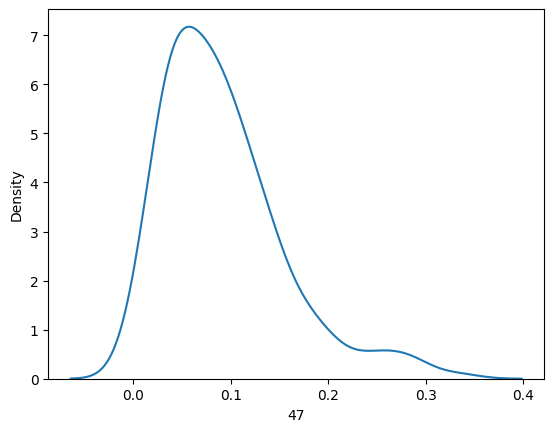

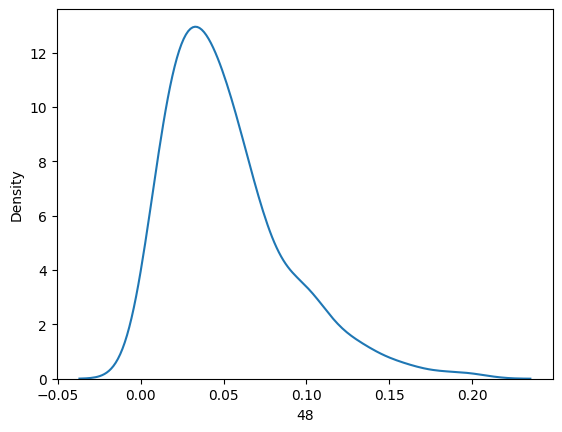

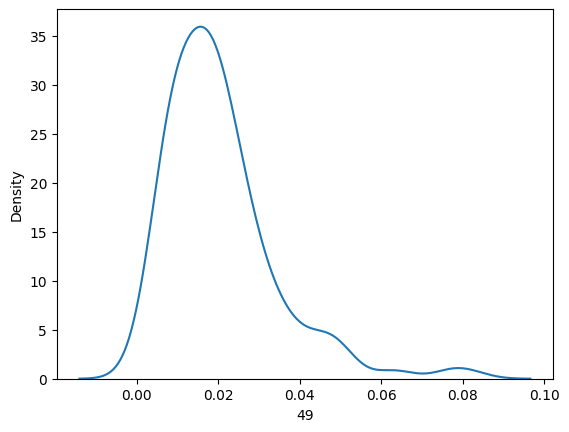

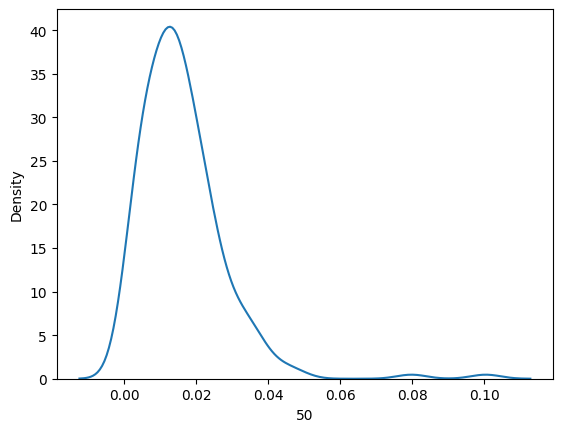

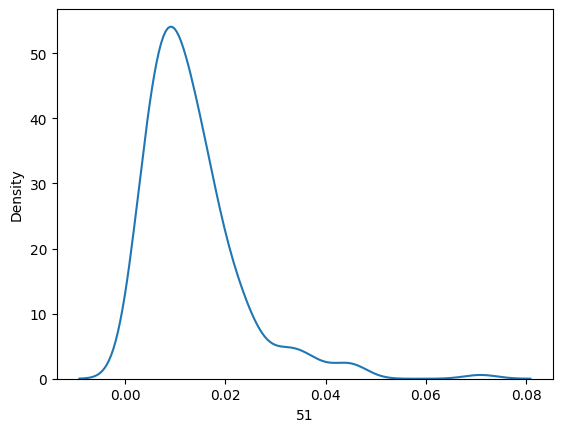

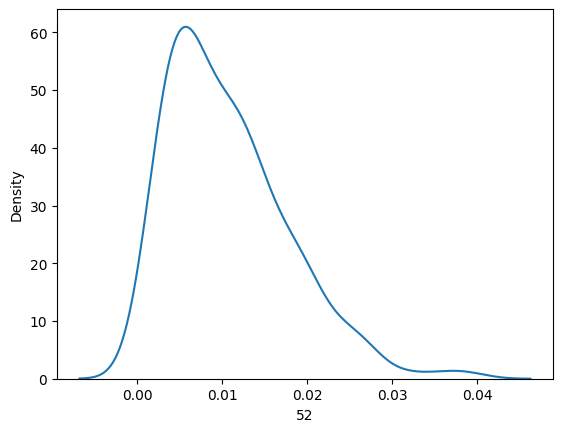

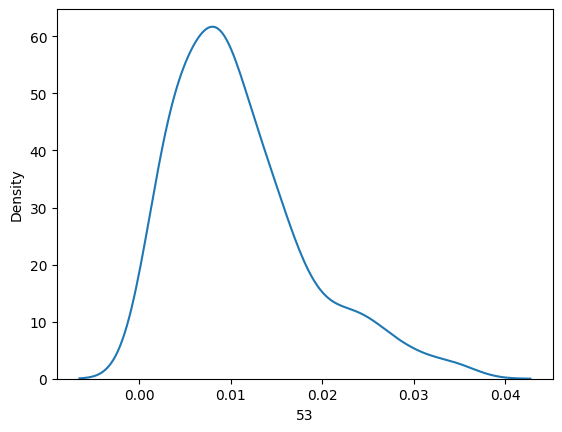

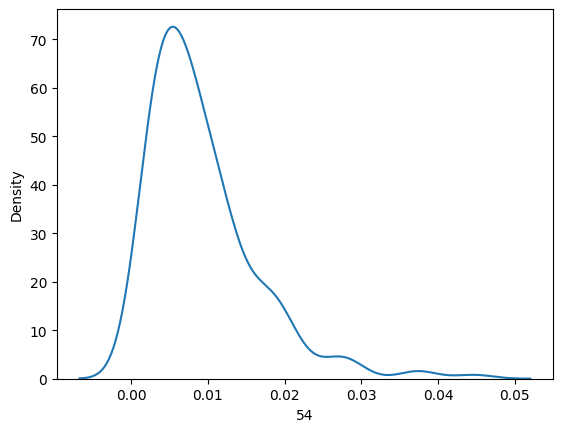

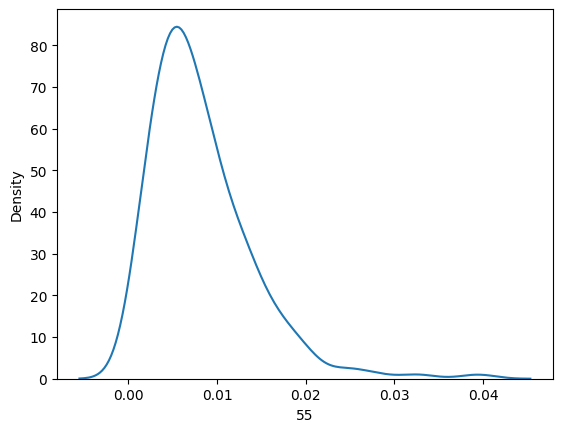

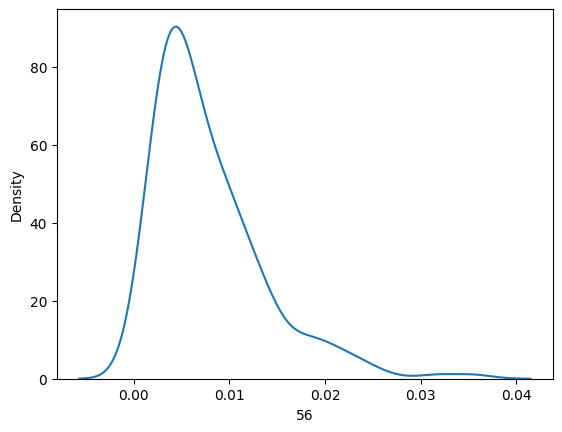

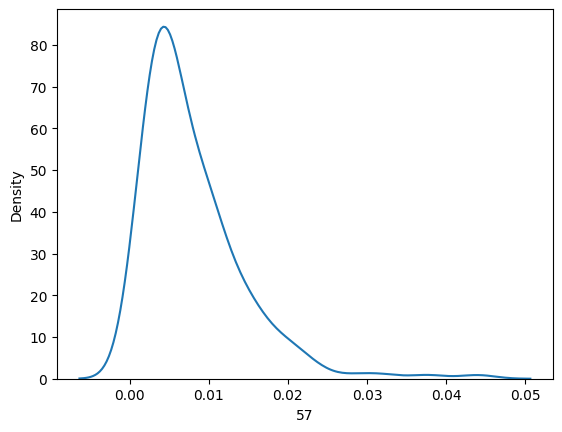

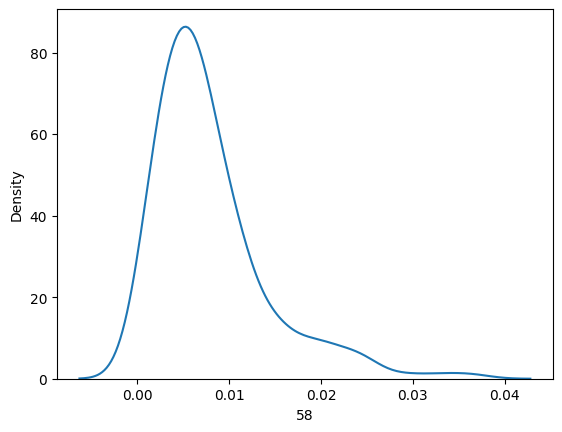

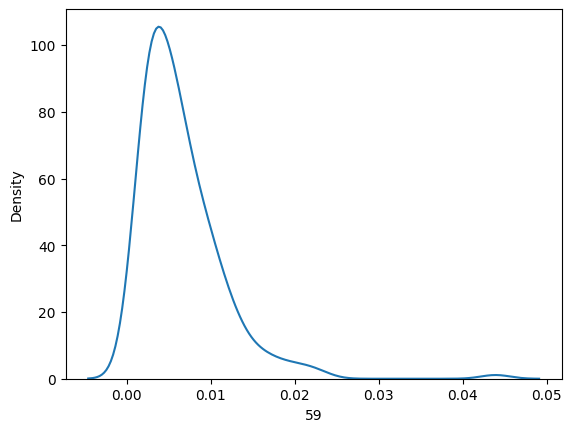

In [14]:
for i in df.select_dtypes(include="number").columns:
    sns.kdeplot(data=df,x=i)
    plt.show()
       

In [15]:
model2 = LogisticRegression()
model2.fit(X_train_scaled, Y_train)

X_train_scaled_predicted = model2.predict(X_train_scaled)
train_acc2 = accuracy_score(X_train_scaled_predicted,Y_train)
print(f"Training Accuracy with scaling: {train_acc2:.2f}")

X_test_scaled_predicted=model2.predict(X_test_scaled)
test_acc2=accuracy_score(X_test_scaled_predicted,Y_test)
print(f"Testing Accuracy with scaling {test_acc2:.2f}")

Training Accuracy with scaling: 0.92
Testing Accuracy with scaling 0.83


In [16]:
print("Coefficients without scaling:", lr.coef_)
print("Coefficients with scaling:", model2.coef_)

Coefficients without scaling: [[-1.99108594e-01 -2.19811210e-01 -1.74874555e-01 -4.74894288e-01
  -2.55801521e-01  2.23490843e-02  1.53111622e-01 -1.60281634e-02
  -8.95089389e-01 -1.13097811e+00 -1.37762683e+00 -1.34170067e+00
  -8.06847975e-01  3.03052762e-02  3.29904237e-01  5.89955314e-01
   5.06848074e-01  2.11124598e-02 -2.84811071e-01 -6.00514810e-01
  -7.69717923e-01 -6.41591285e-01 -3.95897112e-01 -2.10432935e-01
   1.35332872e-01  6.49994934e-01  2.69048647e-01 -7.42089774e-01
  -2.32720675e-01 -1.42774852e-01  6.28427820e-01 -5.29205722e-01
   1.13610346e-03  5.87394630e-01  4.75833297e-01  1.07269009e+00
   6.77803348e-01 -4.01613775e-01 -7.32009366e-01  2.96816762e-01
  -4.43205465e-01 -6.40335516e-01 -9.78560504e-01 -8.65624063e-01
  -1.11499677e+00 -9.52595235e-01 -8.09201470e-01 -7.32689537e-01
  -4.50145327e-01 -6.81736542e-02 -1.32086420e-01 -1.29815313e-01
  -5.85329971e-02 -6.03040259e-02 -2.63593088e-03 -4.70148707e-02
  -5.87997780e-03 -6.45947663e-02 -4.54774335e

In [17]:
print("The accuracy before scaling",training_data_accuracy,testing_data_accuracy)

print("The accuracy after scaling ",train_acc2,test_acc2)

The accuracy before scaling 0.8373493975903614 0.8571428571428571
The accuracy after scaling  0.9216867469879518 0.8333333333333334


In [18]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [19]:
X_test_predicted_rf=rf.predict(X_test)
rf_testing_acc=accuracy_score(Y_test,X_test_predicted_rf)
print(rf_testing_acc)

0.8333333333333334


In [20]:
X_train_predicted_rf=rf.predict(X_train)
rf_training_acc=accuracy_score(Y_train,X_train_predicted_rf)
print(rf_training_acc)

1.0


In [22]:
df.corr

<bound method DataFrame.corr of          0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...   